## 1. Position Trading: Following the Trend

[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


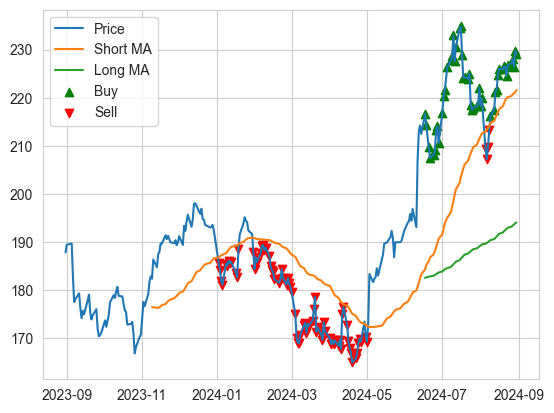

In [2]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock ticker symbol
ticker = "AAPL"

# Download historical data
data = yf.download(ticker, period="1y", interval="1d")

# Calculate moving averages
short_ma = data["Close"].rolling(window=50).mean()
long_ma = data["Close"].rolling(window=200).mean()

# Identify buy and sell signals
buy_signals = (short_ma > long_ma) & (data["Close"] > short_ma)
sell_signals = (short_ma < long_ma) | (data["Close"] < short_ma)

# Plot the data and signals
plt.plot(data["Close"], label="Price")
plt.plot(short_ma, label="Short MA")
plt.plot(long_ma, label="Long MA")
plt.scatter(data.index[buy_signals], data["Close"][buy_signals], marker="^", color="green", label="Buy")
plt.scatter(data.index[sell_signals], data["Close"][sell_signals], marker="v", color="red", label="Sell")
plt.legend()
plt.show()

## 2. Swing Trading: Capturing Short-Term Trends

[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


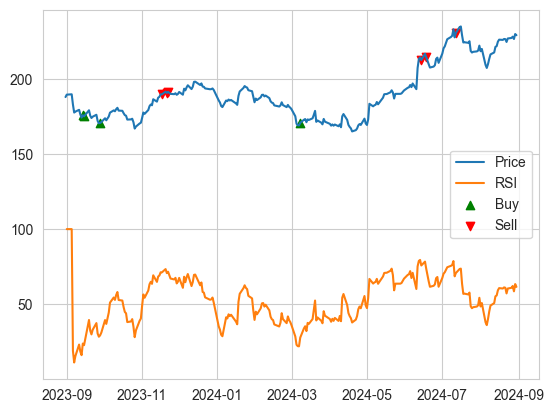

In [3]:
 # Import libraries
import pandas as pd
import numpy as np

# Define the stock ticker symbol
ticker = "AAPL"

# Download historical data
data = yf.download(ticker, period="1y", interval="1d")

# Calculate the Relative Strength Index (RSI)
delta = data["Close"].diff()
gain = delta.clip(lower=0)
loss = -1 * delta.clip(upper=0)
avg_gain = gain.ewm(alpha=1/14).mean()
avg_loss = loss.ewm(alpha=1/14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Identify buy and sell signals
buy_signals = (rsi < 30) & (data["Close"] > data["Close"].rolling(window=10).min())
sell_signals = (rsi > 70) & (data["Close"] < data["Close"].rolling(window=10).max())

# Plot the data and signals
plt.plot(data["Close"], label="Price")
plt.plot(rsi, label="RSI")
plt.scatter(data.index[buy_signals], data["Close"][buy_signals], marker="^", color="green", label="Buy")
plt.scatter(data.index[sell_signals], data["Close"][sell_signals], marker="v", color="red", label="Sell")
plt.legend()
plt.show()

## 3. Mean Reversion: Buying Low and Selling High

[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


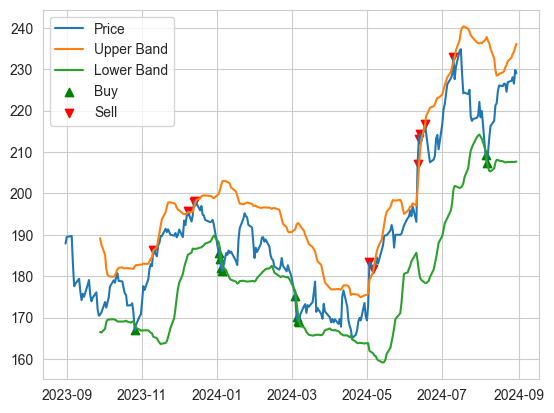

In [4]:
# Import libraries
import pandas as pd
import numpy as np

# Define the stock ticker symbol
ticker = "AAPL"

# Download historical data
data = yf.download(ticker, period="1y", interval="1d")

# Calculate the Bollinger Bands
std = data["Close"].rolling(window=20).std()
upper_band = data["Close"].rolling(window=20).mean() + (2 * std)
lower_band = data["Close"].rolling(window=20).mean() - (2 * std)

# Identify buy and sell signals
buy_signals = (data["Close"] < lower_band)
sell_signals = (data["Close"] > upper_band)

# Plot the data and signals
plt.plot(data["Close"], label="Price")
plt.plot(upper_band, label="Upper Band")
plt.plot(lower_band, label="Lower Band")
plt.scatter(data.index[buy_signals], data["Close"][buy_signals], marker="^", color="green", label="Buy")
plt.scatter(data.index[sell_signals], data["Close"][sell_signals], marker="v", color="red", label="Sell")
plt.legend()
plt.show()